### 1. What is a Convolutional Neural Network (CNN), and how does it differ from traditional fully connected neural networks in terms of architecture and performance on image data?

A Convolutional Neural Network (CNN) is a type of deep learning model that is specially designed to work with image data. It automatically learns important features from images such as edges, shapes, textures, and objects.

Unlike traditional fully connected neural networks, CNNs use convolution layers that focus on small parts of the image instead of the whole image at once.



### 2. Discuss the architecture of LeNet-5 and explain how it laid the foundation for modern deep learning models in computer vision. Include references to its original research paper.

LeNet-5 is one of the first successful Convolutional Neural Networks (CNNs) designed for handwritten digit recognition. It was proposed by Yann LeCun in 1998 and became the foundation of modern computer vision models.

- **LeNet-5 Architecture**
- *LeNet-5 has 7 main layers (excluding input)*:
    1. **Input Layer**
        - Image size: 32 × 32 grayscale
    2. **C1 – Convolution Layer**
        - 6 filters of size 5 × 5
        - Output: feature maps
        - Activation: tanh
    3. **S2 – Subsampling (Pooling) Layer**
        - Average pooling
        - Reduces spatial size
    4. **C3 – Convolution Layer**
        - 16 filters of size 5 × 5
        - Learns more complex features
    5. **S4 – Subsampling Layer**
        - Average pooling
        - Further reduction
    6. **C5 – Fully Connected Convolution**
        - 120 neurons
        - Acts like a fully connected layer
    7. **F6 + Output Layer**
        - Fully connected
        - Final classification using softmax


LeNet-5 laid the foundation of deep learning in computer vision. Its simple but powerful design influenced almost every CNN architecture used today.

### 3. Compare and contrast AlexNet and VGGNet in terms of design principles, number of parameters, and performance. Highlight key innovations and limitations of each.

| Feature         | AlexNet                     | VGGNet                             |
| --------------- | --------------------------- | ---------------------------------- |
| Year            | 2012                        | 2014                               |
| Network Depth   | 8 layers                    | 16–19 layers                       |
| Filter Size     | Large (11×11, 5×5)          | Small (3×3)                        |
| Parameters      | ~60 million                 | ~138 million                       |
| Performance     | Good accuracy               | Very high accuracy                 |
| Training Speed  | Faster                      | Slower                             |
| Key Innovations | ReLU, Dropout, GPU training | Deep network, uniform architecture |
| Limitations     | Less deep, lower accuracy   | Very large size, high memory use   |


### 4. What is transfer learning in the context of image classification? Explain how it helps in reducing computational costs and improving model performance with limited data.

Transfer learning is a technique where a pre-trained model (trained on a large dataset like ImageNet) is reused for a new but related task.

- **Reduces Computational Cost**
    - No need to train the entire network
    - Saves time and GPU resources
    - Faster convergence

- **Improves Model Performance**
    - Better accuracy compared to training from scratch
    - Especially useful for small datasets

Transfer learning is a powerful approach in image classification that allows models to achieve high performance with less data and less computation, making it ideal for practical applications.

### 5. Describe the role of residual connections in ResNet architecture. How do they address the vanishing gradient problem in deep CNNs?

Residual connections make deep CNNs easier to train by solving the vanishing gradient problem, which is why ResNet achieves high accuracy even with very deep architectures.

- **They Solve Vanishing Gradient Problem**
    - Gradients can flow directly backward through shortcut paths
    - Prevents gradients from becoming too small
    - Allows training of very deep networks (50, 101, 152 layers)

### 6. Implement the LeNet-5 architecture using TensorFlow to classify the MNIST dataset. Report the accuracy and training time.

In [4]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input

import time

import warnings
warnings.filterwarnings("ignore")


# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize and reshape data
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0


# Build LeNet-5 model (FIXED)
model = Sequential([
    Input(shape=(28, 28, 1)),
    
    Conv2D(6, kernel_size=5, activation='tanh'),
    AveragePooling2D(pool_size=(2, 2)),
    
    Conv2D(16, kernel_size=5, activation='tanh'),
    AveragePooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(120, activation='tanh'),
    Dense(84, activation='tanh'),
    Dense(10, activation='softmax')
])


# Compile model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train model and record training time
start_time = time.time()

history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.1
)

end_time = time.time()


# Evaluate model
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Test Accuracy:", test_accuracy)
print("Training Time (seconds):", end_time - start_time)



Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9077 - loss: 0.3076 - val_accuracy: 0.9652 - val_loss: 0.1231
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9645 - loss: 0.1141 - val_accuracy: 0.9752 - val_loss: 0.0811
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9763 - loss: 0.0764 - val_accuracy: 0.9813 - val_loss: 0.0614
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9828 - loss: 0.0562 - val_accuracy: 0.9835 - val_loss: 0.0584
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9853 - loss: 0.0449 - val_accuracy: 0.9787 - val_loss: 0.0683
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9788 - loss: 0.0642
Test Accuracy: 0.9787999987602234
Training Time (seconds): 42.4974799156189


### 7. Use a pre-trained VGG16 model (via transfer learning) on a small custom dataset. Replace the top layers and fine-tune the model. Include code and result discussion.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator


img_size = (224, 224)
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255)

train_data = datagen.flow_from_directory(
    "dataset/train",
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical"
)

test_data = datagen.flow_from_directory(
    "dataset/test",
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical"
)

base_model = VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(224, 224, 3)
)

# Freeze pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = Flatten()(x)
x = Dense(128, activation="relu")(x)
output = Dense(train_data.num_classes, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=output)


model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(
    train_data,
    epochs=5,
    validation_data=test_data
)


loss, accuracy = model.evaluate(test_data)
print("Test Accuracy:", accuracy)


Found 4 images belonging to 2 classes.
Found 2 images belonging to 2 classes.
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.5000 - loss: 0.7615 - val_accuracy: 0.5000 - val_loss: 5.9342
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 2.5075 - val_accuracy: 0.0000e+00 - val_loss: 2.3525
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 8.4042e-06 - val_accuracy: 0.5000 - val_loss: 5.6833
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.5000 - val_loss: 8.1212
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.0580 - val_accuracy: 0.5000 - val_loss: 9.4370
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step - accuracy: 0.5000 - loss: 9.4370
Test Accuracy: 0.5


### 8. Write a program to visualize the filters and feature maps of the first convolutional layer on an example input image.

First Conv Layer: block1_conv1


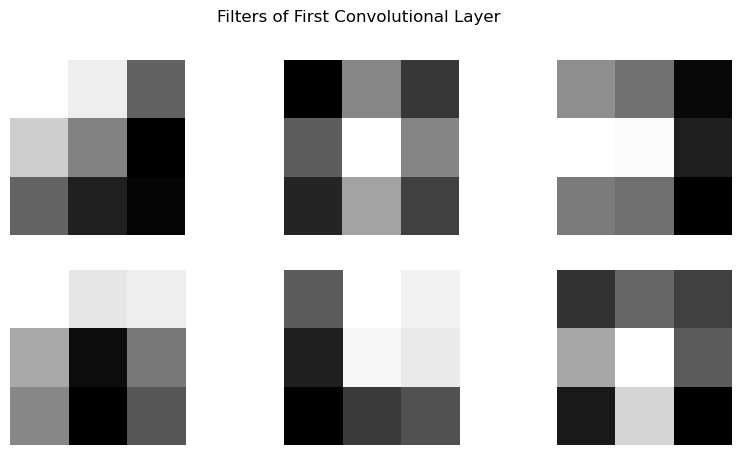

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


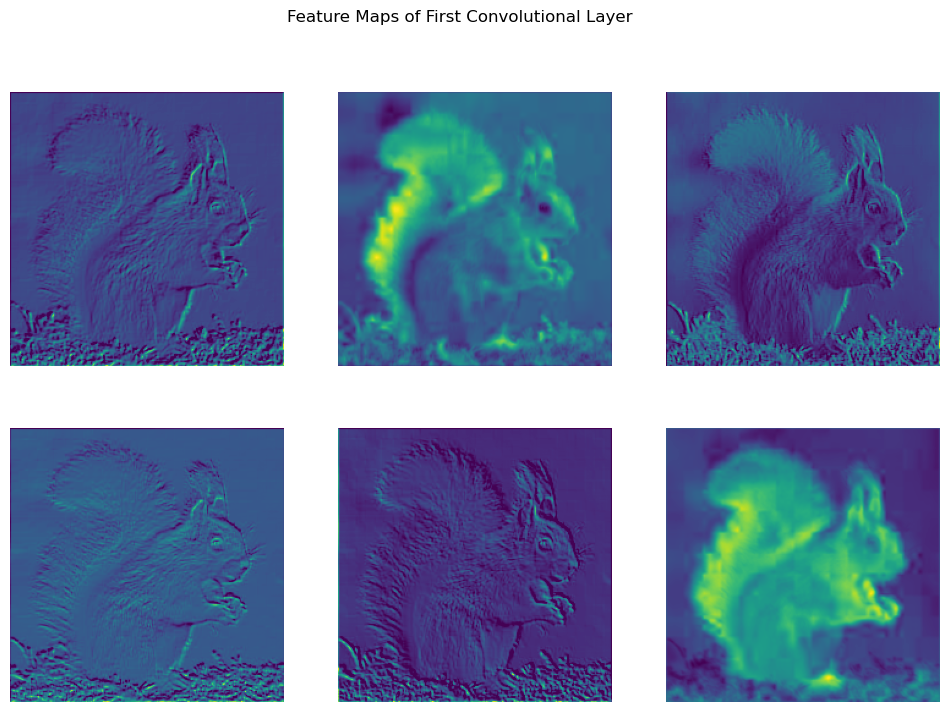

In [5]:
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Load Pre-trained model
model = VGG16(weights="imagenet", include_top=False)

# Get first convolutional layer
first_conv_layer = model.layers[1]

print("First Conv Layer:", first_conv_layer.name)


# Visualizefilters
filters, biases = first_conv_layer.get_weights()

n_filters = 6
plt.figure(figsize=(10, 5))

for i in range(n_filters):
    f = filters[:, :, :, i]
    f = (f - f.min()) / (f.max() - f.min())
    plt.subplot(2, 3, i+1)
    plt.imshow(f[:, :, 0], cmap="gray")
    plt.axis("off")

plt.suptitle("Filters of First Convolutional Layer")
plt.show()


# Load & Prepare input image

img = load_img("sample.jpg", target_size=(224, 224))
img = img_to_array(img)
img = img / 255.0
img = img.reshape((1, 224, 224, 3))

# Feature Map Model
feature_model = Model(
    inputs=model.input,
    outputs=first_conv_layer.output
)

feature_maps = feature_model.predict(img)

# Visualize Features Map
plt.figure(figsize=(12, 8))

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(feature_maps[0, :, :, i], cmap="viridis")
    plt.axis("off")

plt.suptitle("Feature Maps of First Convolutional Layer")
plt.show()


### 9. Train a GoogLeNet (Inception) model using CIFAR-10 dataset. Plot training and validation accuracy and analyze overfitting or underfitting.

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 23s 0us/step
Epoch 1/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 280s 366ms/step - accuracy: 0.5644 - loss: 1.2584 - val_accuracy: 0.5958 - val_loss: 1.1451
Epoch 2/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 211s 300ms/step - accuracy: 0.6440 - loss: 1.0179 - val_accuracy: 0.6048 - val_loss: 1.0960
Epoch 3/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 226s 321ms/step - accuracy: 0.6824 - loss: 0.9140 - val_accuracy: 0.6100 - val_loss: 1.1026
Epoch 4/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 220s 313ms/step - accuracy: 0.7133 - loss: 0.8171 - val_accuracy: 0.6094 - val_loss: 1.1202
Epoch 5/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 229s 326ms/step - accuracy: 0.7475 - loss: 0.7298 - val_accuracy: 0.6078 - val_loss: 1.1540


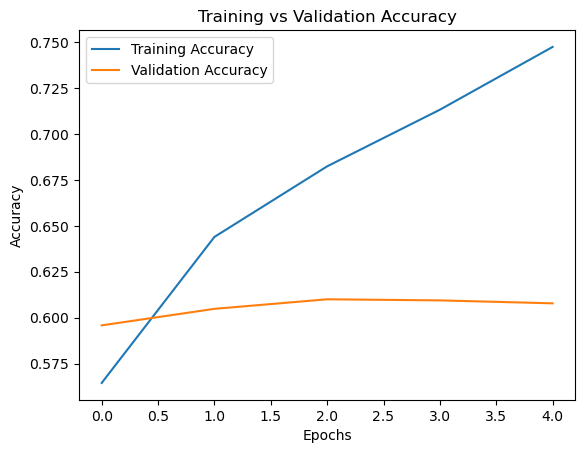

313/313 ━━━━━━━━━━━━━━━━━━━━ 48s 150ms/step - accuracy: 0.6175 - loss: 1.1575
Test Accuracy: 0.6175000071525574


In [8]:
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt


# Load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize
X_train = X_train / 255.0
X_test = X_test / 255.0

# Resize images to 75x75
X_train = tf.image.resize(X_train, (75, 75))
X_test = tf.image.resize(X_test, (75, 75))

# Load Inception Model
base_model = InceptionV3(
    weights="imagenet",
    include_top=False,
    input_shape=(75, 75, 3)
)

# Freeze base layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom Classification Layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation="relu")(x)
output = Dense(10, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=output)

# Compile Model
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Train Model
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.1
)

# Plot training & Validation Accuracy
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()

# Evaluated Model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)



### 10. You are working in a healthcare AI startup. Your team is tasked with developing a system that automatically classifies medical X-ray images into normal, pneumonia, and COVID-19. Due to limited labeled data, what approach would you suggest? Justify your approach and outline a deployment strategy.

- **Suggested Approach**

Due to limited labeled medical X-ray data, the best approach is transfer learning using a pre-trained CNN model, such as ResNet or Inception.

These models are already trained on large datasets and can be fine-tuned for medical image classification.

- **Why transfer learning is Best?**


| Reason           | Explanation                                   |
| ---------------- | --------------------------------------------- |
| Limited data     | Pre-trained models need fewer images          |
| Faster training  | No need to train from scratch                 |
| Better accuracy  | Learned features are reused                   |
| Less overfitting | Freezing early layers improves generalization |

- **Model Choice**
    - **ResNet**: Good for deep feature learning and stable training
    - **Inception**: Captures multi-scale features
    - **Preferred**: ResNet50 (simple and reliable)

- **Training Strategy**
    1. Load pre-trained ResNet/Inception model
    2. Remove top classification layer
    3. Add new layers for 3 classes (Normal, Pneumonia, COVID-19)
    4. Freeze early layers
    5. Fine-tune final layers on X-ray dataset

- **Deployment Strategy (Production Use)**

1. Model Optimization
    - Convert model to TensorFlow Lite
    - Reduce size and improve speed
2. Backend Deployment
    - Deploy model using REST API (Flask/FastAPI)
    - Accept X-ray image as input
3. Inference Pipeline
    - Image preprocessing
    - Model prediction
    - Confidence score output
4. Security & Compliance
    - Data anonymization
    - Secure storage (HIPAA compliant)
    - Access control
5. Monitoring & Updates
    - Track model performance
    - Periodic retraining with new data